### Initial exploratory analysis of the olist_sellers_dataset.csv table set

In [1]:
# Import libraries here
# Tool that allows us to import, better manage the data set
import pandas as pd
# Tool that helps us in the mathematical handling of data
import numpy as np
# Library that helps us in data visualization
import matplotlib.pyplot as plt
# Data visualization tool
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8.27)})

In [2]:
# Import data here
df = pd.read_csv("../../data/raw/olist_sellers_dataset.csv")

In [3]:
# The method is used to display the first rows of the dataframe
df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [4]:
# At this point we visualize the data of the last rows of the dataframe
df.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [5]:
# Check the number of rows and columns of the dataframe
print(df.shape)

(3095, 4)


In [6]:
# We extend information of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [7]:
df.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

- It can be seen that we have 3 columns of type object or characteristic and one column of integer type.
- The integer value refers to the 'seller_zip_code_prefix' column, which makes sense to be an integer since its description refers to the seller's postal code prefixes.
- Regarding the other 3 columns of the object type, we first have the 'seller_id' column, which is the identification of the seller.
- We have the 'seller_city' column that refers to the seller's city, for this reason it must be categorical given that it has textual information of a particular city for each tuple.
- And finally we have the 'seller_state' column that identifies how the name represents the state/region of the seller, for this reason it justifies being of the categorical type.

In [8]:
df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


- Regarding the characteristics of the column 'seller_zip_code_prefix' we can say that the minimum value is 1001, the maximum value is 99730 in case this numbering can give us an added value in a later analysis.

To broaden the panorama of information, we will also include the categorical data and take advantage of the describe(include='all') function, in order to have a greater amount of preliminary information on the data set.

In [9]:
df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


- Regarding the 'seller_id' column, the number of tuples coincides with the number of unique values in the row, which gives us an indication of a correct unique identification for this column.
- Regarding the column 'seller_city' we can say that of the 3095 records it has 611 unique values, with a value that is repeated the most 'sao paulo' which does so with a frequency of 694 opportunities.
- And finally 'seller_state' of the 3095 tuples we have 23 unique values of which is the value that is repeated the most 'SP' which does it in 1849 opportunities.

We will proceed to evaluate if within our data set we have null data or NaN and thus be able to know where.

In [10]:
df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

- We confirm that in this table we do not have NaN values within our data set.

In [11]:
df['seller_id'].value_counts()

3442f8959a84dea7ee197c632cb2df15    1
e26901d5ab434ce92fd9b5c256820a4e    1
7e3f87d16fb353f408d467e74fbd8014    1
9140bd1d9de28b197dce077bdd687438    1
a2b911e9ad40dc7d61c142a4683e2d85    1
                                   ..
f918546be4bec7104d117789ba758b2b    1
eb4a59a06b3948e851a7d7a830bcbc42    1
80146bc52c4f6af5239b23de2a20262b    1
4091f77d8c768fc3e81c20761471761d    1
9e25199f6ef7e7c347120ff175652c3b    1
Name: seller_id, Length: 3095, dtype: int64

In [12]:
df.groupby('seller_id').count()

,seller_zip_code_prefix,seller_city,seller_state
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,1,1
001cca7ae9ae17fb1caed9dfb1094831,1,1,1
001e6ad469a905060d959994f1b41e4f,1,1,1
002100f778ceb8431b7a1020ff7ab48f,1,1,1
003554e2dce176b5555353e4f3555ac8,1,1,1
...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1,1
ffdd9f82b9a447f6f8d4b91554cc7dd3,1,1,1
ffeee66ac5d5a62fe688b9d26f83f534,1,1,1


- We can see in the 'seller_id' column, being pure unique data we will not have data groups by values.

In [13]:
df['seller_zip_code_prefix'].value_counts()

14940    49
13660    10
13920     9
16200     9
87050     8
         ..
83707     1
85065     1
78552     1
3632      1
12051     1
Name: seller_zip_code_prefix, Length: 2246, dtype: int64

In [14]:
df.groupby('seller_zip_code_prefix').count()

,seller_id,seller_city,seller_state
seller_zip_code_prefix,,,
1001,1,1,1
1021,2,2,2
1022,1,1,1
1023,2,2,2
1026,8,8,8
...,...,...,...
99300,1,1,1
99500,3,3,3
99670,1,1,1


- We can observe that within the data set we have in the column 'seller_zip_code_prefix' which shows us that we have the data 14940 which is repeated 49 times, being the one with the highest appearance within the data set, then we see another value whose appearance is of 10 opportunities and so on until you have the unique values of the column.

In [15]:
df['seller_city'].value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [16]:
df.groupby('seller_city').count()

,seller_id,seller_zip_code_prefix,seller_state
seller_city,,,
04482255,1,1,1
abadia de goias,1,1,1
afonso claudio,1,1,1
aguas claras df,1,1,1
alambari,1,1,1
...,...,...,...
volta redonda,2,2,2
votorantim,4,4,4
votuporanga,4,4,4


- Within the 'seller_city' column we can see that we have the value of 'sao paulo', which is the one that is repeated the most, doing it 694 times, followed by other values that are less than 127 repetitions until we reach the unique values.

In [17]:
df['seller_state'].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

In [18]:
df.groupby('seller_state').count()

,seller_id,seller_zip_code_prefix,seller_city
seller_state,,,
AC,1,1,1
AM,1,1,1
BA,19,19,19
CE,13,13,13
DF,30,30,30
ES,23,23,23
GO,40,40,40
MA,1,1,1
MG,244,244,244


<AxesSubplot:xlabel='count', ylabel='seller_state'>

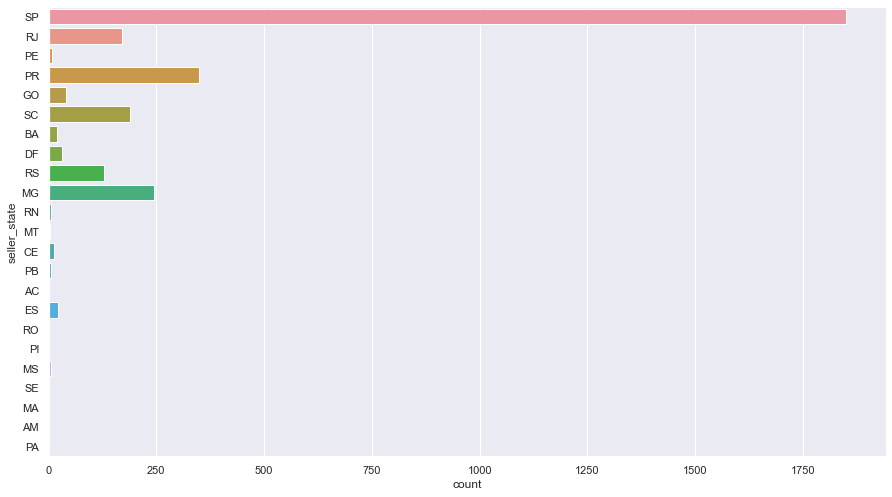

In [19]:
sns.countplot(y='seller_state', data=df)

- In the column 'seller_state' we can observe the different states that appear in the set of which they show us 23 different data giving the one with the highest occurrence 'SP' which does it in 1849 opportunities and its closest one does it in 349 opportunities and so on it decreases until it has the unique data